Вариант 1: Дан граф, описывающий возможность перемещений между локациями. Команда из нескольких героев находится в разных вершинах этого графа. В других вершинах графа находятся монстры. Каждый ход монстр с некоторой вероятностью решает покинуть текущую локацию и перейти в новую, связанную с текущей, либо остаться в текущей вершине. Вероятности перехода монстра в одну из локаций, связанных с текущей, равны. Герой за один ход может совершить лишь один переход в соседнюю локацию. Соберите всех героев в финишной локации.
Если монстр с героем встречаются в одной клетке, то неуспех.
Что есть:
    1.Ненаправленный связный граф
    2.Заполнено 20 процентов графа героями и монстрами
    3.Монстры с какой-то одинаковой вероятностью ходят или остаются.
    4.Герой должен этих монстров обойти.

In [23]:
import random
import itertools
import networkx as nx
import numpy.random as rnd
%matplotlib inline
import matplotlib.pyplot as plt

Генерируем рандомный граф на 20 вершинах

In [24]:
def build_graph():
    er=nx.erdos_renyi_graph(20,0.2)

    nx.draw_circular(er, node_color='y', node_size=1000, with_labels=True)
    
    return er

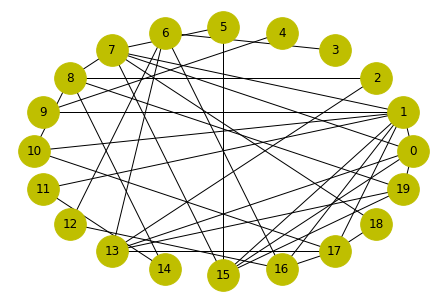

In [25]:
graph = build_graph()

Переделываем формат вершин так, чтобы можно было по ним ходить функцией findPath

In [44]:
V = list(graph.nodes)
edges = list(graph.edges)
E = [[] for V in V]
for i in range(len(V)):
    for e in edges:
        if i in e:
            for s in e:
                if s != i:
                    E[i].append(s)
print(V, '\n', E)
visited = [False] * len(V)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 [[1, 7, 13, 15, 19], [0, 7, 9, 10, 11, 15, 16, 17], [8, 13], [6], [9], [7, 15], [3, 12, 13, 16], [0, 1, 5, 8, 15, 18], [2, 7, 10, 14, 19], [1, 4], [1, 8, 17], [1, 14], [6, 16], [0, 2, 6, 17, 19], [8, 11], [0, 1, 5, 7, 19], [1, 6, 12, 17], [1, 10, 13, 16, 18], [7, 17], [0, 8, 13, 15]]


In [45]:
def findPath(node, where):

    if where == node:
        return True, [V[node]]

    visited[node] = True

    for n in E[node]:
        if visited[n]:
            continue
        ret, l = findPath(n, where)

        if ret:
            l1 = [V[node]]
            l1.extend(l)
            return True, l1
    return False, None

In [46]:
findPath(0, 19)

(True, [0, 1, 7, 5, 15, 19])

Добавляем маркеры для монстров и героев

In [48]:
vertices = [[v, False, False] for v in V]
print(vertices)

[[0, False, False], [1, False, False], [2, False, False], [3, False, False], [4, False, False], [5, False, False], [6, False, False], [7, False, False], [8, False, False], [9, False, False], [10, False, False], [11, False, False], [12, False, False], [13, False, False], [14, False, False], [15, False, False], [16, False, False], [17, False, False], [18, False, False], [19, False, False]]


Сажаем монстров по вершинам

In [49]:
def placeMonster(vert):
    monsters = random.sample(range(20), 5)
    for i in range(len(vert)):
        if i in monsters:
            vert[i][1] = True
    
    return vert

In [50]:
print(placeMonster(vertices))

[[0, False, False], [1, False, False], [2, False, False], [3, False, False], [4, False, False], [5, False, False], [6, False, False], [7, True, False], [8, True, False], [9, True, False], [10, False, False], [11, False, False], [12, False, False], [13, True, False], [14, False, False], [15, False, False], [16, False, False], [17, False, False], [18, False, False], [19, True, False]]


Сажаем героев по вершинам

In [ ]:
def placeHero(vert):
    h = 0
    heroes = random.sample(range(20), 3)
    for i in range(len(vert)):
        findPlace(i, heroes)

def findPlace(i, heroes):
    if i in heroes:
        if vert[i][1] == False:
            vert[i][2] = True
        elif vert[i][1] == True or vert[i][2] == True:
            
                
                
                
                
            
            